In [293]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

## scarico il dataframe di movies e lo osservo

In [294]:
movies_df = pd.read_csv("C:/Users/bland/PycharmProjects/progetto/data/movies.csv")
genres_df = pd.read_csv("C:/Users/bland/PycharmProjects/progetto/data/genres.csv")

In [295]:
movies_df.shape

(941597, 7)

In [296]:
movies_df.head()

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


In [297]:
movies_df = movies_df.set_index('id')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941597 entries, 1000001 to 1941597
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   name         941587 non-null  object 
 1   date         849684 non-null  float64
 2   tagline      139387 non-null  object 
 3   description  780785 non-null  object 
 4   minute       760027 non-null  float64
 5   rating       90999 non-null   float64
dtypes: float64(3), object(3)
memory usage: 50.3+ MB


In [298]:
movies_df.describe()

,date,minute,rating
count,849684.000000,760027.000000,90999.000000
mean,1998.522300,65.776516,3.244043
std,27.534865,154.828161,0.417281
min,1874.000000,1.000000,0.880000
25%,1986.000000,15.000000,3.020000
50%,2010.000000,62.000000,3.300000
75%,2019.000000,92.000000,3.510000
max,2031.000000,72000.000000,4.690000


## pulizia

In [299]:
movies_df['name'] = movies_df['name'].astype('string')
movies_df['tagline'] = movies_df['tagline'].astype('string')
movies_df['description'] = movies_df['description'].astype('string')

In [300]:
movies_df['year'] = pd.to_datetime(movies_df['date'], format='%Y')

In [301]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941597 entries, 1000001 to 1941597
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   name         941587 non-null  string        
 1   date         849684 non-null  float64       
 2   tagline      139387 non-null  string        
 3   description  780785 non-null  string        
 4   minute       760027 non-null  float64       
 5   rating       90999 non-null   float64       
 6   year         849684 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), string(3)
memory usage: 57.5 MB


In [302]:
movies_df.tail()

,name,date,tagline,description,minute,rating,year
id,,,,,,,
1941593,神笛,NaN,<NA>,<NA>,NaN,NaN,NaT
1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,<NA>,Shinjuku forest at night. In the sap taverns o...,30.0,NaN,NaT
1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,<NA>,"The city that never sleeps, where insects gath...",30.0,NaN,NaT
1941596,重生,NaN,<NA>,"In a world where order has broken down, darkne...",NaN,NaN,NaT
1941597,青ひげ公の城,NaN,<NA>,<NA>,130.0,NaN,NaT


In [303]:
movies_df.duplicated(subset=['name', 'year', 'date', 'minute', 'description', 'tagline', 'rating']).sum()

4066

In [304]:
movies_df = movies_df.drop_duplicates(subset=['name', 'year', 'date', 'minute', 'description', 'tagline', 'rating'])

## grafici

In [305]:
f = movies_df[movies_df['year'] == "2031-01-01"]
f.head()

,name,date,tagline,description,minute,rating,year
id,,,,,,,
1011069,Avatar 5,2031.0,<NA>,<NA>,NaN,NaN,2031-01-01


In [306]:
def counts_on_bars(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

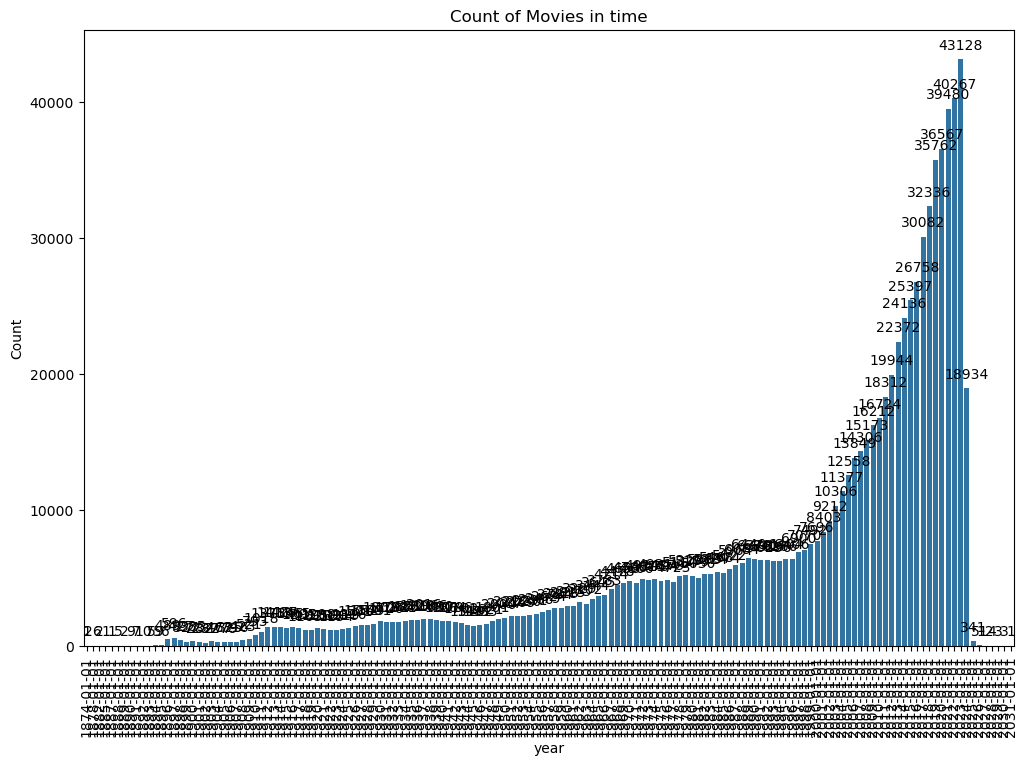

In [307]:
plt.figure(figsize=(12, 8))
ordered_years = sorted(movies_df['year'].dropna().unique())
ax = sns.countplot(x = 'year', data = movies_df, order=ordered_years)
plt.title('Count of Movies in time')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=90)
counts_on_bars(ax)
plt.show()

<Figure size 1400x600 with 0 Axes>

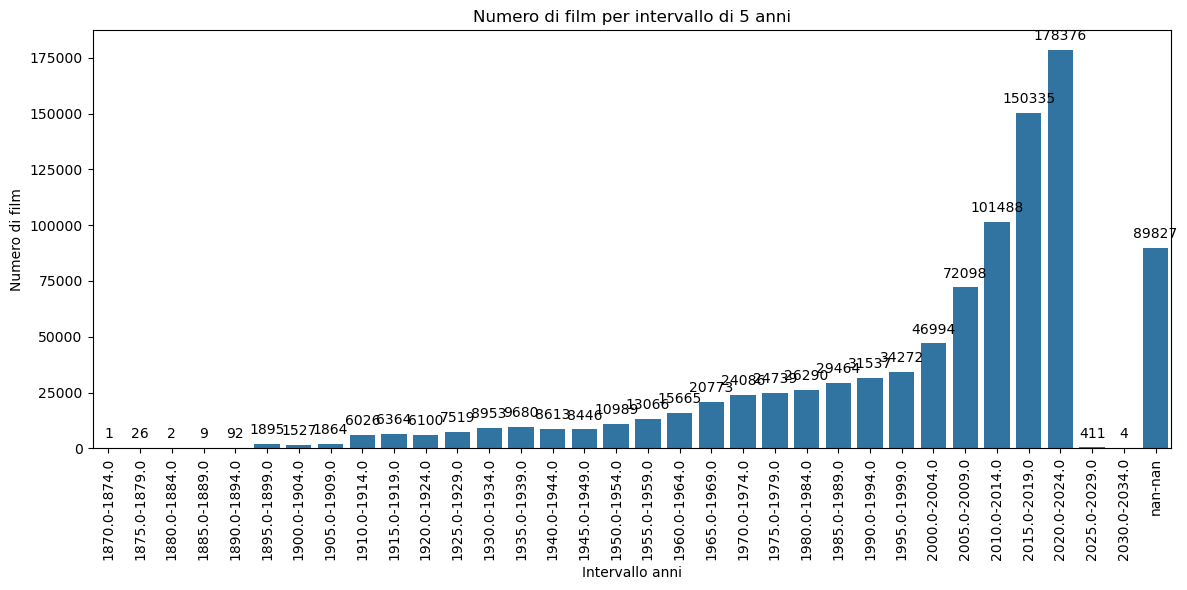

In [308]:
plt.figure(figsize=(14, 6))
movies_df['year_group'] = (movies_df['date'] // 5) * 5
movies_df['year_group'] = movies_df['year_group'].astype(str) + '-' + (movies_df['year_group'] + 4).astype(str)

order = sorted(movies_df['year_group'].unique())

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='year_group', data=movies_df, order=order)
plt.title('Numero di film per intervallo di 5 anni')
plt.xlabel('Intervallo anni')
plt.ylabel('Numero di film')
plt.xticks(rotation=90)
counts_on_bars(ax)

plt.tight_layout()
plt.show()

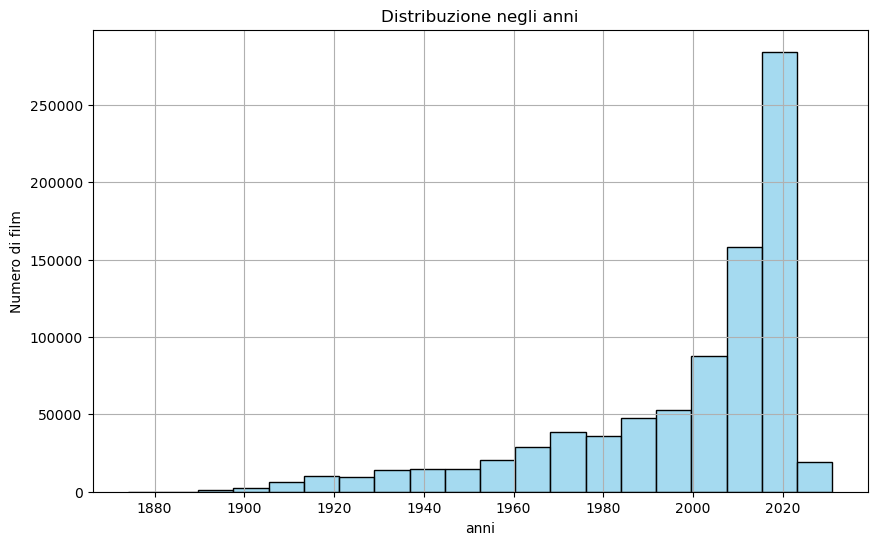

In [320]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='year', bins=20, kde=False, color='skyblue')
plt.title('Distribuzione negli anni')
plt.xlabel('anni')
plt.ylabel('Numero di film')
plt.grid(True)
plt.show()

In [309]:
max_rating = movies_df['rating'].max()

# Selezioniamo la/le righe che hanno quel valore
top_movies = movies_df[movies_df['rating'] == max_rating]

# Stampiamo il risultato
print(top_movies)


                     name    date  \
id                                  
1000864          Harakiri  1962.0   
1001983  Band of Brothers  2001.0   

                                                   tagline  \
id                                                           
1000864  The world has never understood why the Japanes...   
1001983  There was a time when the world asked ordinary...   

                                               description  minute  rating  \
id                                                                           
1000864  Down-on-his-luck veteran Tsugumo Hanshirō ente...   135.0    4.69   
1001983  Drawn from interviews with survivors of Easy C...   594.0    4.69   

              year     year_group  
id                                 
1000864 1962-01-01  1960.0-1964.0  
1001983 2001-01-01  2000.0-2004.0  


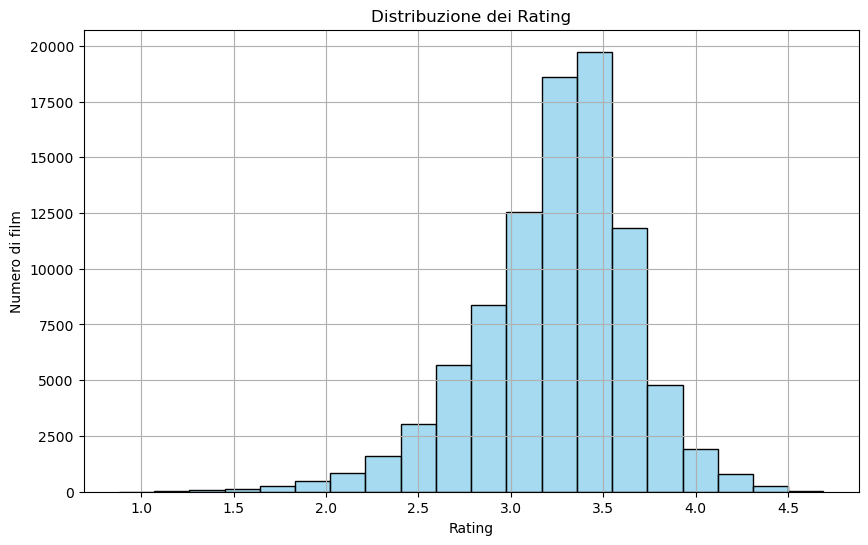

In [310]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='rating', bins=20, kde=False, color='skyblue')
plt.title('Distribuzione dei Rating')
plt.xlabel('Rating')
plt.ylabel('Numero di film')
plt.grid(True)
plt.show()


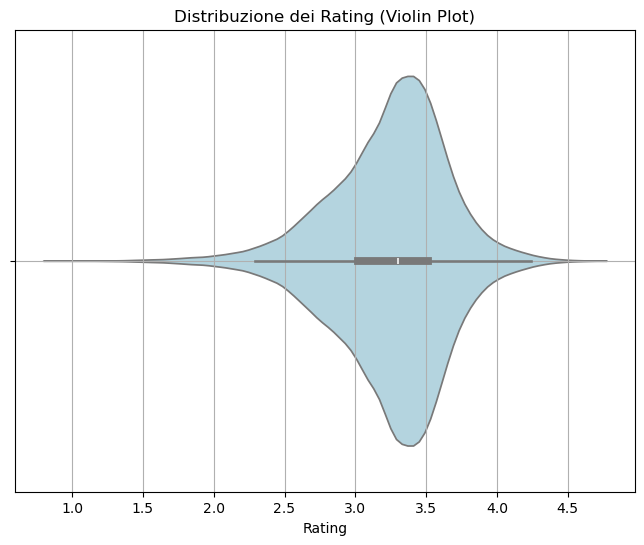

In [311]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=movies_df, x='rating', color='lightblue')
plt.title('Distribuzione dei Rating (Violin Plot)')
plt.xlabel('Rating')
plt.grid(True)
plt.show()


In [312]:
# Trova uno dei valori duplicati
dup_key = movies_df[movies_df.duplicated(subset=['name', 'year'])].iloc[0][['name', 'year']]

# Estrai le due righe che corrispondono a quella coppia
coppia = movies_df[(movies_df['name'] == dup_key['name']) & (movies_df['year'] == dup_key['year'])]

print(coppia)

                           name    date tagline  \
id                                                
1002060  Scenes from a Marriage  1973.0    <NA>   
1007105  Scenes from a Marriage  1973.0    <NA>   

                                               description  minute  rating  \
id                                                                           
1002060  Johan and Marianne are married and seem to hav...   169.0    4.36   
1007105  Johan and Marianne are married and seem to hav...   283.0    4.41   

              year     year_group  
id                                 
1002060 1973-01-01  1970.0-1974.0  
1007105 1973-01-01  1970.0-1974.0  


In [313]:
genres_df.shape

(1046849, 2)

In [314]:
genres_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046849 entries, 0 to 1046848
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1046849 non-null  int64 
 1   genre   1046849 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [315]:
genres_df.head(50)

,id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama
5,1000003,Science Fiction
6,1000003,Adventure
7,1000003,Comedy
8,1000003,Action
9,1000004,Drama


In [316]:
genres_df['genre'] = genres_df['genre'].astype('string')

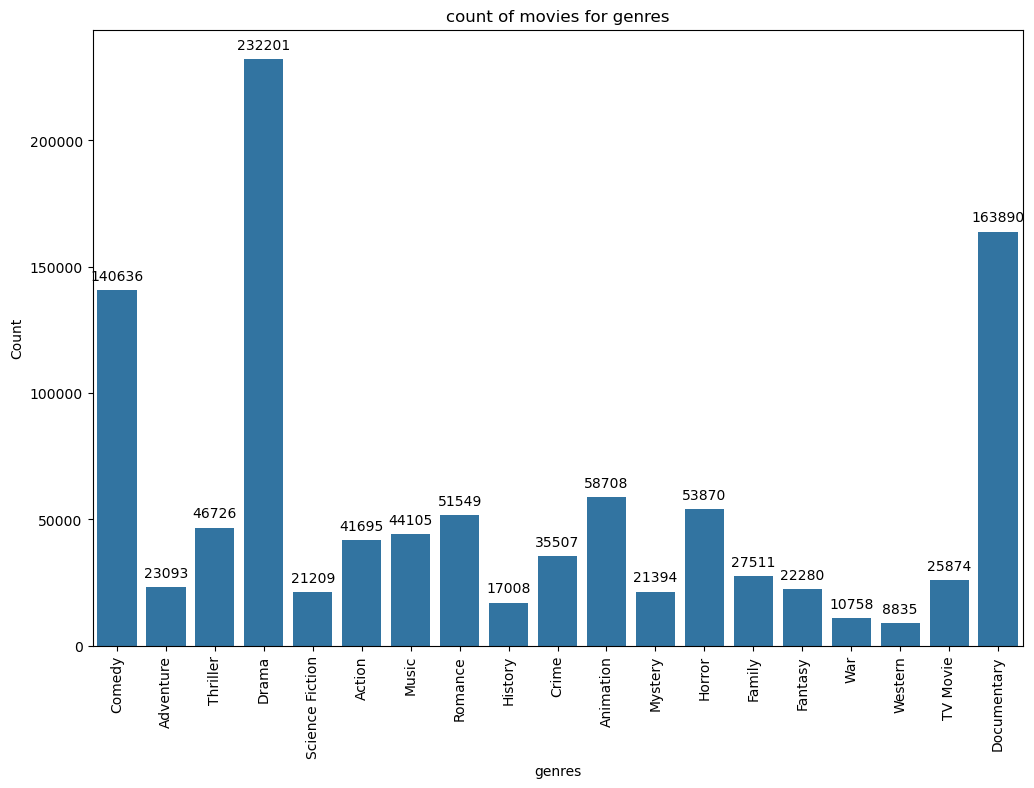

In [319]:
plt.figure(figsize=(12, 8))
ordered_years = sorted(genres_df['genre'].dropna().unique())
ax = sns.countplot(x = 'genre', data = genres_df)
plt.title('count of movies for genres')
plt.xlabel('genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
counts_on_bars(ax)
plt.show()

In [317]:
merged_df = pd.merge(movies_df, genres_df, left_on='id', right_on='id', how='right')

In [318]:
merge_df.head()

,id,name,date,tagline,description,minute,rating,year,year_group,genre
0,1000001,Barbie,2023,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,2023-01-01,2020-2024,Comedy
1,1000001,Barbie,2023,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,2023-01-01,2020-2024,Adventure
2,1000002,Parasite,2019,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,2019-01-01,2015-2019,Comedy
3,1000002,Parasite,2019,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,2019-01-01,2015-2019,Thriller
4,1000002,Parasite,2019,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,2019-01-01,2015-2019,Drama
